<div align="right">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>20 Eyl 2018</td>
    <td>TR </td>
  </tr>
</table>
</div>

# SVM (Support Vector Machines) - Karar Destek Makineleri 2. Bölüm

Bir önceki yazımızda SVM'e bir giriş yapmıştık ve lineer durumlar için SVM'in nasıl çalıştığını görmüştük.

[SVM 1. Bölüm](https://www.datafloyd.com/tr/svm-support-vector-machines-karar-destek-makineleri-1-bolum/)

Bu yazımızda lineer olmayan durumlarda ne yapılıyor ve öznitelik dönüşümü nasıl kullanılıyor bir bakalım 

## Öznitelikleri (features) modifiye mi etsek acaba?

Eğer elimizde lineer olarak ayrılmayan bir veri seti varsa, *veri setindeki öznitelikleri çeşitli dönüşümlerden geçirerek onları lineer olarak ayrılabilir hale getirmek mümkün olabilir*. Konuyu daha iyi anlayabilmek için basit bir örnek  yapalım.

Bu örnekte verimiz tek boyutlu $X_1$ ekseninde -3'ten başlayıp birer birer artarak 3'e kadar giden tamsayılar olsun 

In [9]:
import numpy as np
# Seaborn dark theme tercihimizdir :)
import seaborn as sns
sns.set_style("darkgrid")

import numpy as np

import matplotlib.pyplot as plt
# colormap kullanmak için
from matplotlib.colors import ListedColormap
%matplotlib notebook

<IPython.core.display.Javascript object>


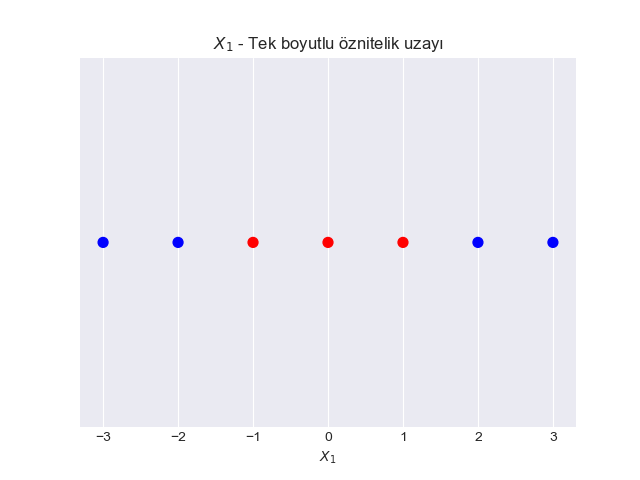

In [10]:
# Lineer olarak 
X_1 = np.array([-3,-2,-1,0,1,2,3])
y = np.array([1,1,0,0,0,1,1])

plt.figure()
# y eksenini yok edelim
plt.gca().get_yaxis().set_visible(False)
# mavi ve kırmızı bir colormap olsun
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_1, np.zeros(len(X_1)),c=y, s=50,cmap=cm_bright)
plt.xlabel(r"$X_1$");
plt.title(r"$X_1$ - Tek boyutlu öznitelik uzayı");

Şekle baktığımızda bu noktaların **lineer olarak ayrılamayacağını** görüyoruz. Buradaki $X_1$ değişkeninden yeni bir öznitelik türetelim. Mesela karesini alalım, bakalım neler olacak
$$ X_2 =X_1^2$$

<IPython.core.display.Javascript object>


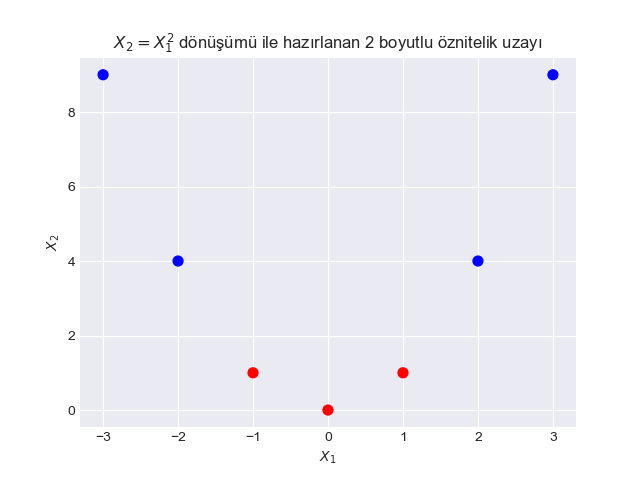

In [11]:
X_2 = X_1**2
plt.figure()
# mavi ve kırmızı bir colormap olsun
plt.scatter(X_1, X_2, c=y, s=50,cmap=cm_bright);
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");
plt.title(r"$X_2=X_1^2$ dönüşümü ile hazırlanan 2 boyutlu öznitelik uzayı");

Şimdi biraz anlam ifade etmeye başlıyor sanırım. **Lineer olmayan bir dönüşüm ile yeni bir öznitelik türettik ve problemi 1 boyuttan 2 boyuta taşıdık.** Bu ikinci boyutta sınıfları lineer olarak ayırmak mümkün gibi görünüyor.

Şimdi bu hipotezimizi **lineer SVM** ile deneyelim.

In [12]:
# Öncelikle veriyi birleştirmemiz lazım
X = np.vstack([X_1,X_2]).T
# Sınıflandırıcıyı hazırlayalım
from sklearn.svm import SVC
svm = SVC(kernel="linear",C=1,random_state=42)

# datafloyd paketi
import sys
sys.path.append("..")
from datafloyd.plot import plot_decision_region, plot_svm_decision_region_2d

# verimize uygulayalım
# not: test ve train olarak ayırmıyoruz seti
svm.fit(X,y);

<IPython.core.display.Javascript object>


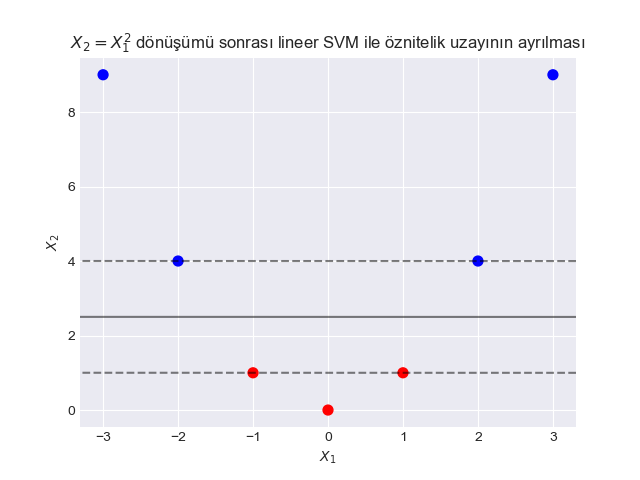

In [13]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap=cm_bright);
plot_svm_decision_region_2d(svm,plot_support=False)
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");
plt.title(r"$X_2=X_1^2$ dönüşümü sonrası lineer SVM ile öznitelik uzayının ayrılması");

Sanırım sizi lineer olmayan bir dönüşüm ile sınıflandırmanın gerçekleştirilebileceğine ikna ettim :) 

## Polinom özniteliklerin kullanımı

Bu teoriyi biraz daha formal bir yoldan deneyelim. Yani scikit-learn ile polinom öznitelikler oluşturalım ve bunları ayır edebiliyor muyuz bakalım?

<IPython.core.display.Javascript object>


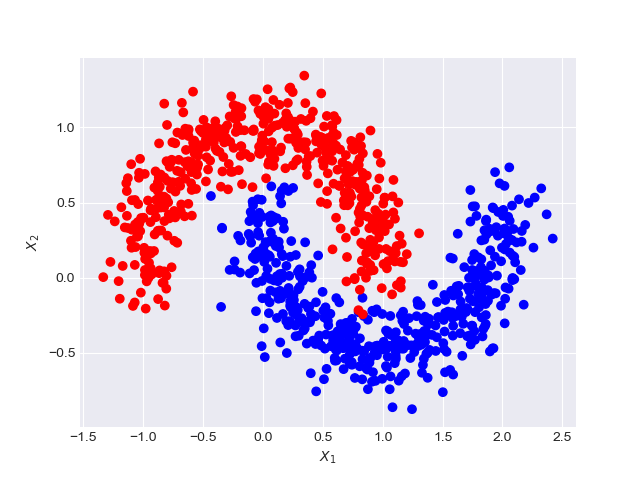

In [14]:
from sklearn.datasets import make_moons
# Spiral bir veri seti oluşturur
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)
plt.figure()
ax = plt.axes()
# veri setini görelim
ax.scatter(X[:,0],X[:,1],c=y,cmap=cm_bright);
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");

Aşağıdaki kod parçasında ""Pipeline" ve "PolynomialFeatures" konularına hakim değilseniz dert etmeyin :) Bunları da ilerleyen günlerde inceleyeceğim. Şimdilik  yazının keyfini çıkarmaya bakın

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly_scaler_svm = Pipeline((
("poly_features", PolynomialFeatures(degree=3)),("scaler", StandardScaler()),("svm_clf", SVC(kernel="linear",C=1,random_state=42))))
poly_scaler_svm.fit(X, y);

<IPython.core.display.Javascript object>


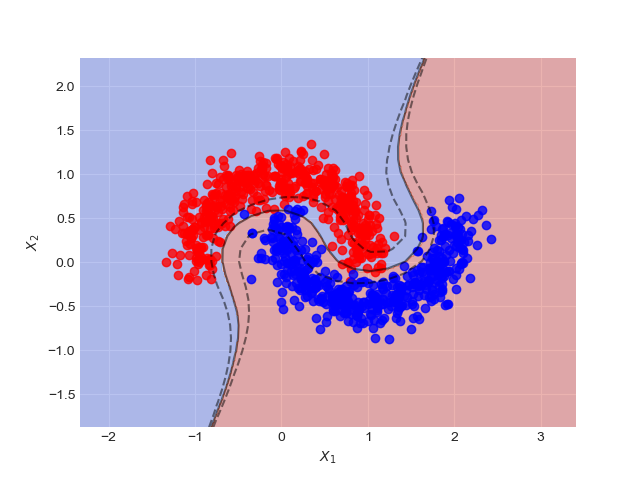

In [16]:
plt.figure()
plot_decision_region(X,y,poly_scaler_svm)
plot_svm_decision_region_2d(poly_scaler_svm,plot_support=False)
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");


Mideye mi benzedi biraz sanki... Neyse sonuçta SVM'in kompleks bir çizgiyi de oluşturabildiğini gördük.

Şimdi bunları biraz hazmedelim :) Hemen bitirmeyeceğim bir yazımız daha olacak.